In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [39]:
df = pd.read_csv("/content/all_counts.csv", index_col=0)  # treat first column as index
df = df.reset_index().rename(columns={"index": "gloss"})        # make it a clean column
df.head()

,gloss,count_ASL,count_WLASL,count_MSASL,total_count
0,bird,1,10,31,42
1,fish,1,10,30,41
2,eat,1,7,33,41
3,teacher,1,8,31,40
4,orange,1,10,29,40


In [40]:
print("Total number of unique glosses:", len(df))
print("Total occurrences (all datasets):", df['total_count'].sum())
print("Mean occurrences per gloss:", df['total_count'].mean())
print("Median occurrences per gloss:", df['total_count'].median())
print("Gloss with max occurrences:", df.loc[df['total_count'].idxmax(), 'gloss'])
print("Gloss with min occurrences:", df.loc[df['total_count'].idxmin(), 'gloss'])

Total number of unique glosses: 3067
Total occurrences (all datasets): 24104
Mean occurrences per gloss: 7.859145745027714
Median occurrences per gloss: 6.0
Gloss with max occurrences: bird
Gloss with min occurrences: picnic


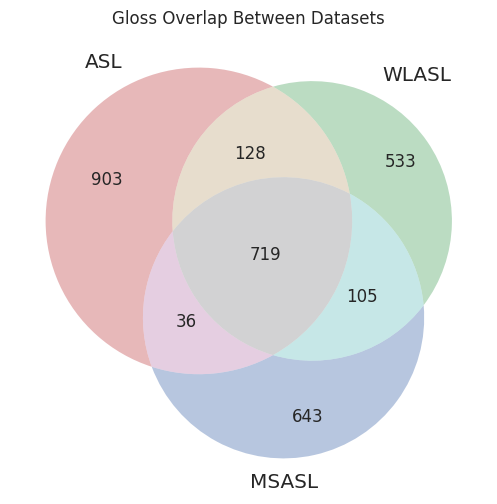

In [41]:
import matplotlib.pyplot as plt
from matplotlib_venn import venn3

# ------------------ Compute subsets correctly ------------------
asl_only      = ((df['count_ASL']>0) & (df['count_WLASL']==0) & (df['count_MSASL']==0)).sum()
wlasl_only    = ((df['count_ASL']==0) & (df['count_WLASL']>0) & (df['count_MSASL']==0)).sum()
msasl_only    = ((df['count_ASL']==0) & (df['count_WLASL']==0) & (df['count_MSASL']>0)).sum()

asl_wlasl     = ((df['count_ASL']>0) & (df['count_WLASL']>0) & (df['count_MSASL']==0)).sum()
asl_msasl     = ((df['count_ASL']>0) & (df['count_WLASL']==0) & (df['count_MSASL']>0)).sum()
wlasl_msasl   = ((df['count_ASL']==0) & (df['count_WLASL']>0) & (df['count_MSASL']>0)).sum()

all_three     = ((df['count_ASL']>0) & (df['count_WLASL']>0) & (df['count_MSASL']>0)).sum()

# ------------------ Draw Venn Diagram ------------------
plt.figure(figsize=(8,6))
venn3(
    subsets=(asl_only, wlasl_only, msasl_only, asl_wlasl, asl_msasl, wlasl_msasl, all_three),
    set_labels=('ASL', 'WLASL', 'MSASL')
)
plt.title("Gloss Overlap Between Datasets")
plt.show()


/tmp/ipython-input-3300881581.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="gloss", y="total_count", data=top20, palette="viridis")


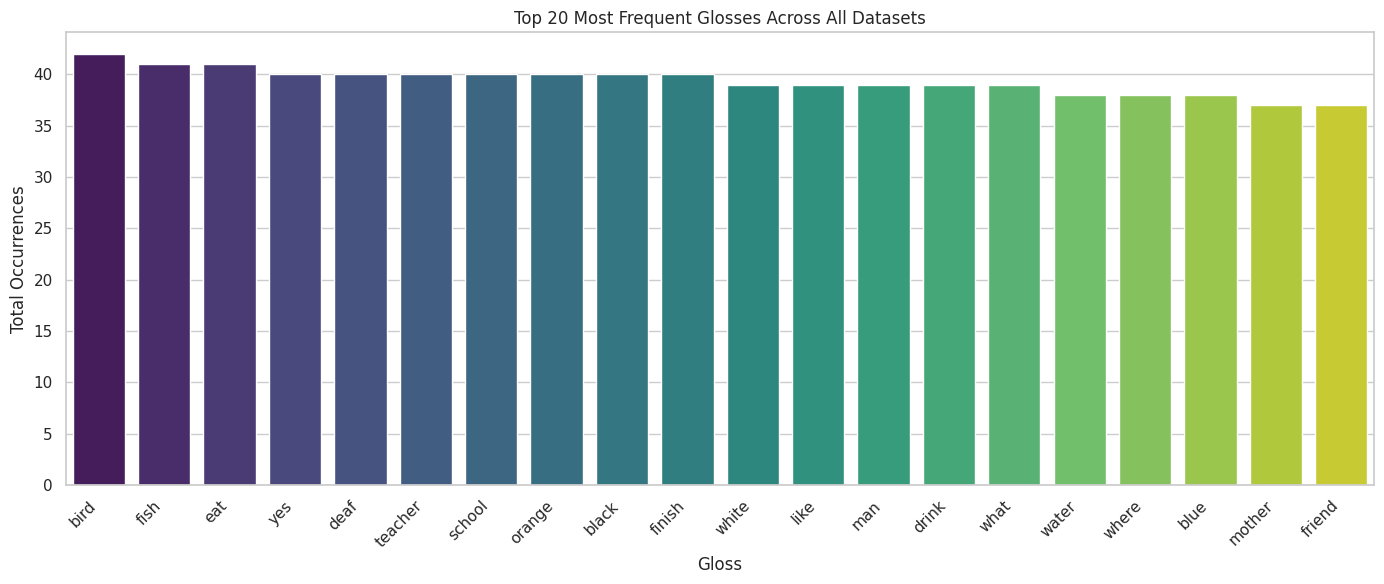

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
top20 = df.sort_values("total_count", ascending=False).head(20)

plt.figure(figsize=(14,6))
sns.barplot(x="gloss", y="total_count", data=top20, palette="viridis")
plt.xticks(rotation=45, ha="right")
plt.xlabel("Gloss")
plt.ylabel("Total Occurrences")
plt.title("Top 20 Most Frequent Glosses Across All Datasets")
plt.tight_layout()
plt.show()

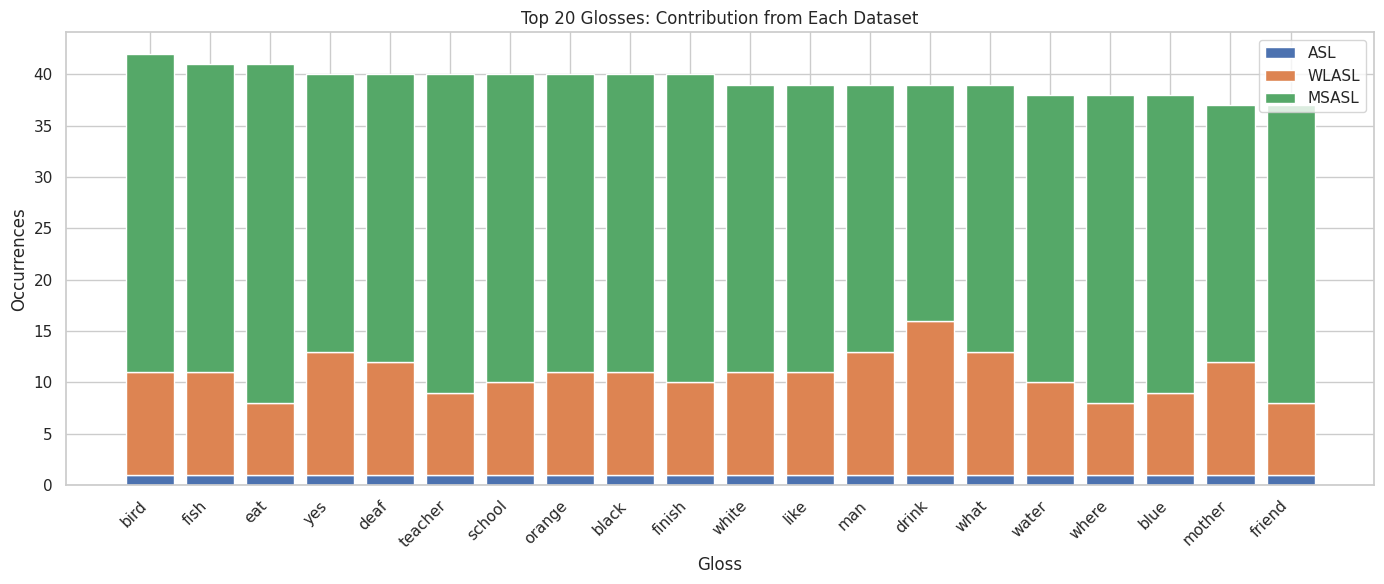

In [43]:
top20 = df.sort_values("total_count", ascending=False).head(20)

plt.figure(figsize=(14,6))
plt.bar(top20['gloss'], top20['count_ASL'], label='ASL')
plt.bar(top20['gloss'], top20['count_WLASL'], bottom=top20['count_ASL'], label='WLASL')
plt.bar(top20['gloss'], top20['count_MSASL'], bottom=top20['count_ASL'] + top20['count_WLASL'], label='MSASL')

plt.xticks(rotation=45, ha='right')
plt.xlabel("Gloss")
plt.ylabel("Occurrences")
plt.title("Top 20 Glosses: Contribution from Each Dataset")
plt.legend()
plt.tight_layout()
plt.show()

/tmp/ipython-input-2648842383.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="gloss", y="total_count", data=top20, palette="viridis")


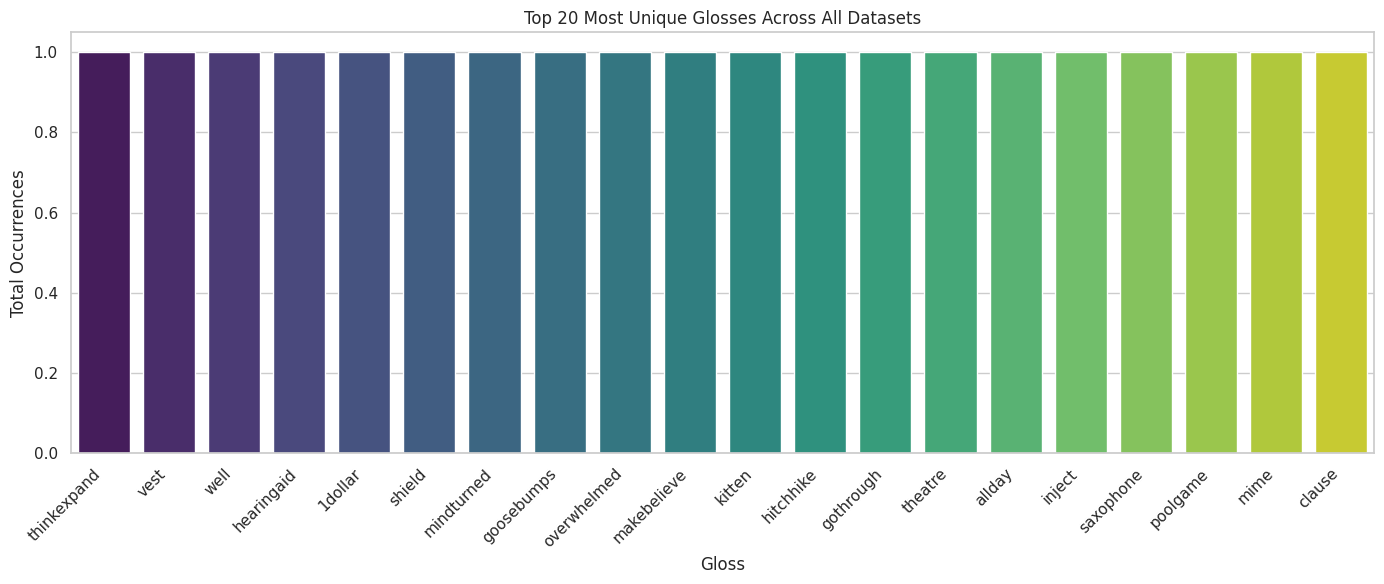

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
top20 = df.sort_values("total_count", ascending=True).head(20)

plt.figure(figsize=(14,6))
sns.barplot(x="gloss", y="total_count", data=top20, palette="viridis")
plt.xticks(rotation=45, ha="right")
plt.xlabel("Gloss")
plt.ylabel("Total Occurrences")
plt.title("Top 20 Most Unique Glosses Across All Datasets")
plt.tight_layout()
plt.show()